In [98]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
import sklearn as skl
import tensorflow as tf
import numpy as np

In [99]:
file_path="data-1602560227781.csv"
Df=pd.read_csv(file_path)
Df.head(20)

,name,na_sales,median_playtime,positive_ratings,negative_ratings,average_ratings,critic_score,price
0,Grand Theft Auto V,6.37,4834,329061,139308,9837,9.4,24.99
1,Grand Theft Auto V,6.06,4834,329061,139308,9837,9.7,24.99
2,Garry's Mod,NaN,1875,363721,16433,12422,NaN,6.99
3,Grand Theft Auto: San Andreas,NaN,249,26877,3243,807,9.5,9.99
4,Grand Theft Auto: Vice City,8.41,93,9817,819,209,9.6,5.99
5,Grand Theft Auto V,9.06,4834,329061,139308,9837,NaN,24.99
6,Counter-Strike: Source,NaN,400,76640,3497,6842,9.3,7.19
7,Grand Theft Auto III,6.99,63,4718,750,98,9.5,5.99
8,Portal 2,NaN,520,138220,1891,1102,9.7,7.19
9,Grand Theft Auto V,NaN,4834,329061,139308,9837,NaN,24.99


In [100]:
#grabbing the log off the average ratings column
Df['Positive_Rating_Ratio'] = Df['positive_ratings']/(Df['positive_ratings']+Df['negative_ratings'])
Df

,name,na_sales,median_playtime,positive_ratings,negative_ratings,average_ratings,critic_score,price,Positive_Rating_Ratio
0,Grand Theft Auto V,6.37,4834,329061,139308,9837,9.4,24.99,0.702568
1,Grand Theft Auto V,6.06,4834,329061,139308,9837,9.7,24.99,0.702568
2,Garry's Mod,NaN,1875,363721,16433,12422,NaN,6.99,0.956773
3,Grand Theft Auto: San Andreas,NaN,249,26877,3243,807,9.5,9.99,0.892331
4,Grand Theft Auto: Vice City,8.41,93,9817,819,209,9.6,5.99,0.922997
...,...,...,...,...,...,...,...,...,...
30246,Find The Balance,NaN,0,1,1,0,NaN,3.99,0.500000
30247,Gem Wars: Attack of the Jiblets,NaN,0,37,23,0,NaN,0.00,0.616667
30248,True Fear: Forsaken Souls Part 2,NaN,0,133,18,0,NaN,7.19,0.880795
30249,Atom Universe,NaN,6,152,226,3,NaN,0.00,0.402116


In [101]:
#grabbing the log off the average ratings column
Df['Negative_Rating_Ratio'] = 1-Df['Positive_Rating_Ratio']
Df

,name,na_sales,median_playtime,positive_ratings,negative_ratings,average_ratings,critic_score,price,Positive_Rating_Ratio,Negative_Rating_Ratio
0,Grand Theft Auto V,6.37,4834,329061,139308,9837,9.4,24.99,0.702568,0.297432
1,Grand Theft Auto V,6.06,4834,329061,139308,9837,9.7,24.99,0.702568,0.297432
2,Garry's Mod,NaN,1875,363721,16433,12422,NaN,6.99,0.956773,0.043227
3,Grand Theft Auto: San Andreas,NaN,249,26877,3243,807,9.5,9.99,0.892331,0.107669
4,Grand Theft Auto: Vice City,8.41,93,9817,819,209,9.6,5.99,0.922997,0.077003
...,...,...,...,...,...,...,...,...,...,...
30246,Find The Balance,NaN,0,1,1,0,NaN,3.99,0.500000,0.500000
30247,Gem Wars: Attack of the Jiblets,NaN,0,37,23,0,NaN,0.00,0.616667,0.383333
30248,True Fear: Forsaken Souls Part 2,NaN,0,133,18,0,NaN,7.19,0.880795,0.119205
30249,Atom Universe,NaN,6,152,226,3,NaN,0.00,0.402116,0.597884


In [102]:
# Select Critic_Score & Positive Rating Ratio
critic_vs_positive = Df[['critic_score', 'Positive_Rating_Ratio']]
critic_vs_positive.head(5)

,critic_score,Positive_Rating_Ratio
0,9.4,0.702568
1,9.7,0.702568
2,NaN,0.956773
3,9.5,0.892331
4,9.6,0.922997


In [103]:
critic_vs_positive.count()

critic_score               711
Positive_Rating_Ratio    30251
dtype: int64

In [104]:
# Find null value
for column in critic_vs_positive.columns:
    print(f'Column {column} has {critic_vs_positive[column].isnull().sum()} null values')

Column critic_score has 29540 null values
Column Positive_Rating_Ratio has 0 null values


In [105]:
critic_vs_positive = critic_vs_positive.dropna()
critic_vs_positive

,critic_score,Positive_Rating_Ratio
0,9.4,0.702568
1,9.7,0.702568
3,9.5,0.892331
4,9.6,0.922997
6,9.3,0.956362
...,...,...
6209,9.0,0.969167
6337,8.5,0.944086
6398,9.0,0.921550
6434,7.0,0.782857


In [106]:
critic_vs_positive.shape

(711, 2)

In [108]:
# Format the data to meet the requirements of the Scikit-learn library
X = critic_vs_positive.critic_score.values.reshape(-1, 1)

(711,)


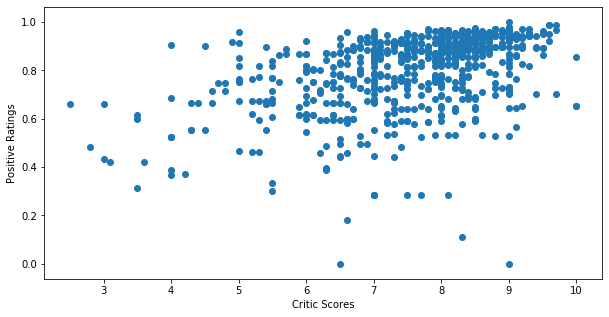

In [115]:
y = critic_vs_positive.Positive_Rating_Ratio
# Visually inspect the relationship between Positive Ratings & Global_Sales
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(critic_vs_positive.critic_score, critic_vs_positive.Positive_Rating_Ratio)
plt.ylabel('Positive Ratings')
plt.xlabel('Critic Scores')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [114]:
print(model.coef_)
print(model.intercept_)

[0.0567865]
0.36852825203284745
